In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from os import system
import graphviz
from pyramid.arima import auto_arima




C:\Users\arjun\Anaconda3\lib\site-packages\pyramid\__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision with the
    Pyramid web framework. For more information, see Issue #34:
    
        https://github.com/tgsmith61591/pyramid/issues/34
        
    The package will subsequently be installable via the name 'pmdarima'; the
    only functional change to the user will be the import name. All imports
    from 'pyramid' will change to 'pmdarima'.
    
  """, UserWarning)


In [2]:
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [3]:
input_data1 = pd.read_csv("C:/Users/arjun/Downloads/Crimes_2001_to_present.csv", index_col='Date')


print(type(input_data1))

<class 'pandas.core.frame.DataFrame'>


In [4]:
input_data1[input_data1['Primary Type'].isin(['HOMICIDE'])]['Primary Type']

Date
09/22/2008 11:24:00 PM    HOMICIDE
09/22/2008 11:37:00 PM    HOMICIDE
09/23/2008 09:57:00 AM    HOMICIDE
09/23/2008 01:40:00 PM    HOMICIDE
09/23/2008 08:25:00 PM    HOMICIDE
09/25/2008 12:56:00 AM    HOMICIDE
09/25/2008 01:00:00 AM    HOMICIDE
09/26/2008 01:10:00 AM    HOMICIDE
09/27/2008 10:39:00 PM    HOMICIDE
09/28/2008 02:29:00 AM    HOMICIDE
09/28/2008 06:02:00 PM    HOMICIDE
09/28/2008 09:50:00 PM    HOMICIDE
09/29/2008 03:35:00 AM    HOMICIDE
09/28/2008 10:07:00 AM    HOMICIDE
09/30/2008 08:03:00 PM    HOMICIDE
09/05/2008 05:35:00 AM    HOMICIDE
09/17/2008 04:39:00 PM    HOMICIDE
10/02/2008 06:00:00 AM    HOMICIDE
10/02/2008 08:00:00 AM    HOMICIDE
10/02/2008 11:30:00 AM    HOMICIDE
10/04/2008 01:15:00 AM    HOMICIDE
10/04/2008 03:43:00 AM    HOMICIDE
10/04/2008 05:30:00 AM    HOMICIDE
10/05/2008 08:32:00 AM    HOMICIDE
10/06/2008 12:01:00 AM    HOMICIDE
10/06/2008 12:01:00 AM    HOMICIDE
10/05/2008 10:32:00 PM    HOMICIDE
10/06/2008 05:20:00 PM    HOMICIDE
10/06/2008 11:0

In [5]:
input_data1.index

Index(['03/18/2015 07:44:00 PM', '03/18/2015 11:00:00 PM',
       '03/18/2015 10:45:00 PM', '03/18/2015 10:30:00 PM',
       '03/18/2015 09:00:00 PM', '03/18/2015 10:00:00 PM',
       '03/18/2015 11:00:00 PM', '03/18/2015 09:35:00 PM',
       '03/18/2015 10:09:00 PM', '03/18/2015 09:25:00 PM',
       ...
       '01/27/2018 03:07:00 PM', '10/08/2018 06:30:00 PM',
       '10/01/2018 12:00:00 AM', '11/03/2018 04:00:00 PM',
       '11/05/2018 01:00:00 PM', '11/17/2016 12:01:00 AM',
       '11/09/2018 03:00:00 PM', '11/07/2018 07:00:00 AM',
       '11/09/2018 07:30:00 PM', '11/09/2018 12:09:00 AM'],
      dtype='object', name='Date', length=6745724)

In [7]:
input_data1.index = pd.to_datetime(input_data1.index)

In [8]:
HC = pd.DataFrame(input_data1[input_data1['Primary Type'].isin(['HOMICIDE'])]['Primary Type'])
HC.head(10)

,Primary Type
Date,
2008-09-22 23:24:00,HOMICIDE
2008-09-22 23:37:00,HOMICIDE
2008-09-23 09:57:00,HOMICIDE
2008-09-23 13:40:00,HOMICIDE
2008-09-23 20:25:00,HOMICIDE
2008-09-25 00:56:00,HOMICIDE
2008-09-25 01:00:00,HOMICIDE
2008-09-26 01:10:00,HOMICIDE
2008-09-27 22:39:00,HOMICIDE


In [9]:
dates = pd.date_range('20070101',periods=18250)
df = pd.DataFrame(np.random.randn(18250), columns = list ('A'))
df['date'] = dates
df = df[['date','A']]
df.head()

,date,A
0,2007-01-01,-0.399708
1,2007-01-02,-0.878117
2,2007-01-03,0.456196
3,2007-01-04,1.557034
4,2007-01-05,0.008324


In [23]:
def get_season(row):
    if row >= 3 and  row <= 5:
        return '1'
    elif row >= 6 and  row <= 8:
        return '2'
    elif row >= 9 and row <= 11:
        return '3'
    else:
        return '4'



In [25]:
input_data1['Season'] = input_data1['mon'].apply(get_season)

In [32]:
input_data1.tail(100)
input_data1['Season'].dtype

dtype('O')

In [40]:
input_data1.head()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,mon,Season
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-18 19:44:00,10000092,HY189866,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,1111,...,04B,1144606.0,1903566.0,2015,02/10/2018 03:50:01 PM,41.891399,-87.744385,"(41.891398861, -87.744384567)",3,1
2015-03-18 23:00:00,10000094,HY190059,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,725,...,26,1166468.0,1860715.0,2015,02/10/2018 03:50:01 PM,41.773372,-87.665319,"(41.773371528, -87.665319468)",3,1
2015-03-18 22:45:00,10000095,HY190052,044XX S LAKE PARK AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,222,...,08B,1185075.0,1875622.0,2015,02/10/2018 03:50:01 PM,41.813861,-87.596643,"(41.81386068, -87.596642837)",3,1
2015-03-18 22:30:00,10000096,HY190054,051XX S MICHIGAN AVE,0460,BATTERY,SIMPLE,APARTMENT,False,False,225,...,08B,1178033.0,1870804.0,2015,02/10/2018 03:50:01 PM,41.800802,-87.622619,"(41.800802415, -87.622619343)",3,1
2015-03-18 21:00:00,10000097,HY189976,047XX W ADAMS ST,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,False,False,1113,...,03,1144920.0,1898709.0,2015,02/10/2018 03:50:01 PM,41.878065,-87.743354,"(41.878064761, -87.743354013)",3,1


In [46]:
df1 = input_data1[['Primary Type', 'Season']]

In [ ]:
df1['Season'].groupby(df1['Primary Type']).sum()

In [56]:
df1['Count'] = df.groupby(['Primary Type'])['Season'].transform('count')
df1.drop_duplicates()

,Primary Type,Season,Count
Date,,,
2015-03-18 19:44:00,BATTERY,1,NaN
2015-03-18 23:00:00,OTHER OFFENSE,1,NaN
2015-03-18 21:00:00,ROBBERY,1,NaN
2015-03-18 22:09:00,NARCOTICS,1,NaN
2015-03-18 21:30:00,CRIMINAL DAMAGE,1,NaN
2015-03-18 21:14:00,WEAPONS VIOLATION,1,NaN
2015-03-18 22:31:00,THEFT,1,NaN
2015-03-18 12:55:00,BURGLARY,1,NaN
2015-03-18 20:00:00,MOTOR VEHICLE THEFT,1,NaN


In [55]:
df1.head()

,Primary Type,Season
0,ARSON,1
1,ARSON,2
2,ARSON,3
3,ARSON,4
4,ASSAULT,1


In [50]:
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df1.groupby(['Primary Type','Season']).count(['Season']).unstack().plot(ax=ax)

TypeError: count() takes 1 positional argument but 2 were given

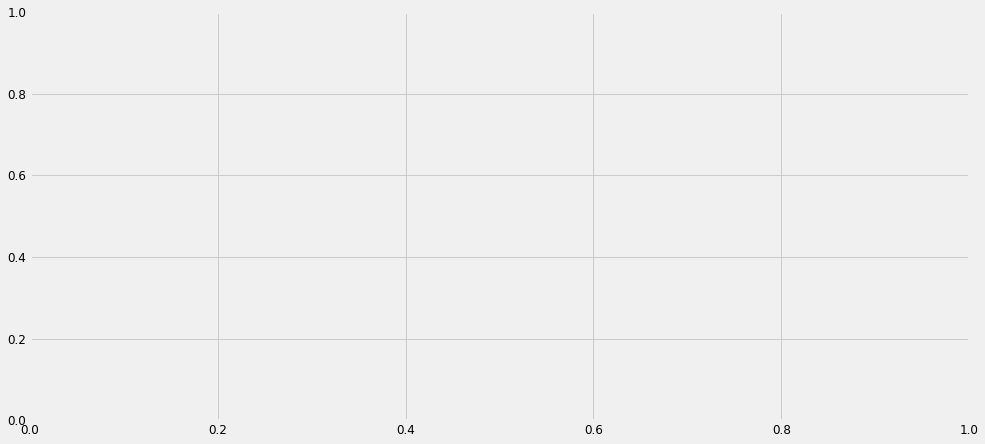

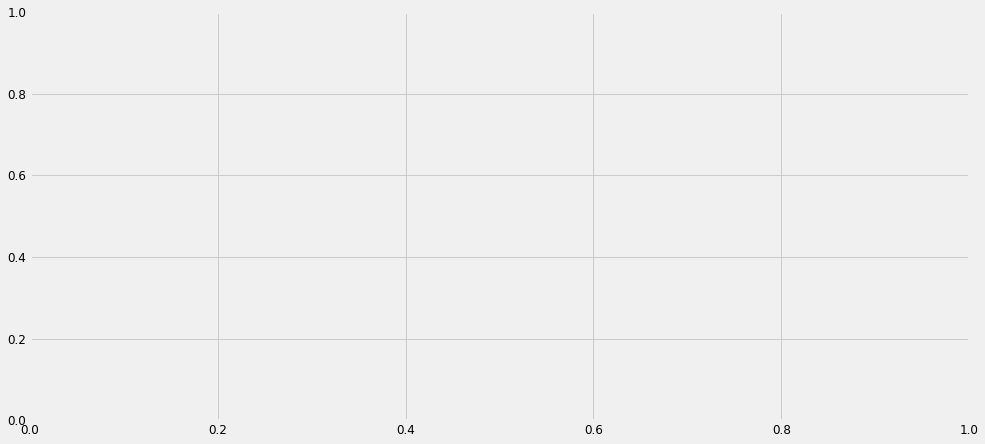

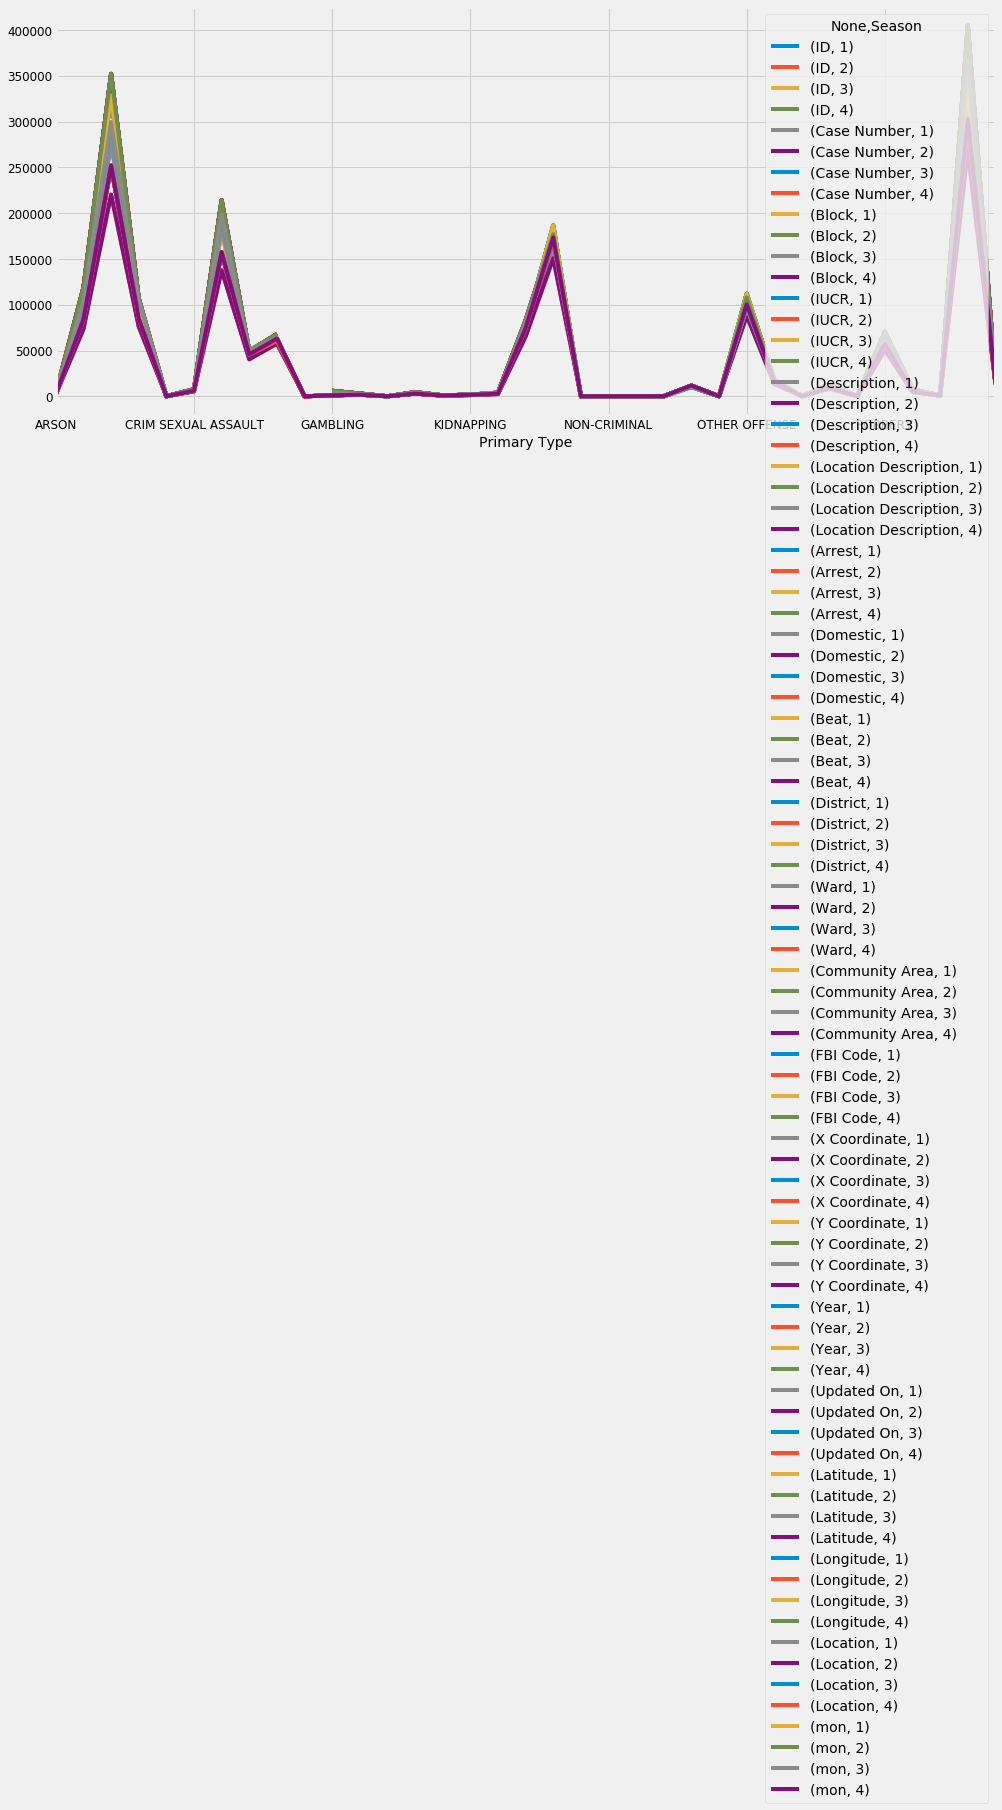

In [44]:
plt.show()

In [35]:
df = input_data1.groupby(['Primary Type','Season']).count()

TypeError: sort_values() missing 1 required positional argument: 'by'

In [39]:
df.head()

ID  Case Number   Block    IUCR  Description  \
Primary Type Season                                                     
ARSON        1         2972         2972    2972    2972         2972   
             2         3197         3197    3197    3197         3197   
             3         2749         2749    2749    2749         2749   
             4         2233         2233    2233    2233         2233   
ASSAULT      1       112637       112637  112637  112637       112637   

                     Location Description  Arrest  Domestic    Beat  District  \
Primary Type Season                                                             
ARSON        1                       2972    2972      2972    2972      2972   
             2                       3197    3197      3197    3197      3197   
             3                       2749    2749      2749    2749      2749   
             4                       2233    2233      2233    2233      2233   
ASSAULT      1                     112637  112637    112637  112637    112637   

                      ...    Community Area  FBI Code  X Coordinate  \
Primary Type Season   ...                                             
ARSON        1        ...              2564      2972          2960   
             2        ...              2900      3197          3182   
             3        ...              2512      2749          2713   
             4        ...              1859      2233          2218   
ASSAULT      1        ...             99915    112637        112090   

                     Y Coordinate    Year  Updated On  Latitude  Longitude  \
Primary Type Season                                                          
ARSON        1               2960    2972        2972      2960       2960   
             2               3182    3197        3197      3182       3182   
             3               2713    2749        2749      2713       2713   
             4               2218    2233        2233      2218       2218   
ASSAULT      1             112090  112637      112637    112090     112090   

                     Location     mon  
Primary Type Season                    
ARSON        1           2960    2972  
             2           3182    3197  
             3           2713    2749  
             4           2218    2233  
ASSAULT      1         112090  112637  

[5 rows x 21 columns]

In [53]:
theft.head()


,Primary Type,mon
Date,,
2015-03-18 22:31:00,THEFT,3
2015-03-18 21:00:00,THEFT,3
2015-03-18 22:45:00,THEFT,3
2015-03-18 22:00:00,THEFT,3
2015-03-18 22:30:00,THEFT,3


In [6]:
grouper = theft.groupby([pd.TimeGrouper('M'), 'Primary Type'])

In [7]:
grouper.head()

,Primary Type
Date,
2015-03-18 22:31:00,THEFT
2015-03-18 21:00:00,THEFT
2015-03-18 22:45:00,THEFT
2015-03-18 22:00:00,THEFT
2015-03-18 22:30:00,THEFT
2002-01-23 00:00:00,THEFT
2015-02-01 13:00:00,THEFT
2015-02-28 20:00:00,THEFT
2015-01-11 10:00:00,THEFT


In [35]:
data = grouper['Primary Type'].count().unstack()
data.tail(50)

Primary Type,THEFT
Date,
2014-10-31,5562
2014-11-30,4539
2014-12-31,4750
2015-01-31,4403
2015-02-28,3228
2015-03-31,4274
2015-04-30,4527
2015-05-31,4941
2015-06-30,5014


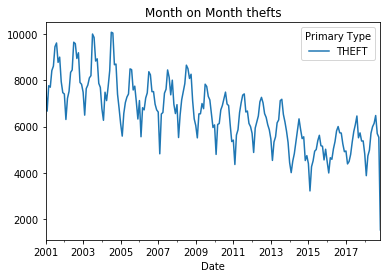

In [11]:
import matplotlib.pyplot as plt
data.plot()
plt.title("Month on Month thefts")
plt.show()

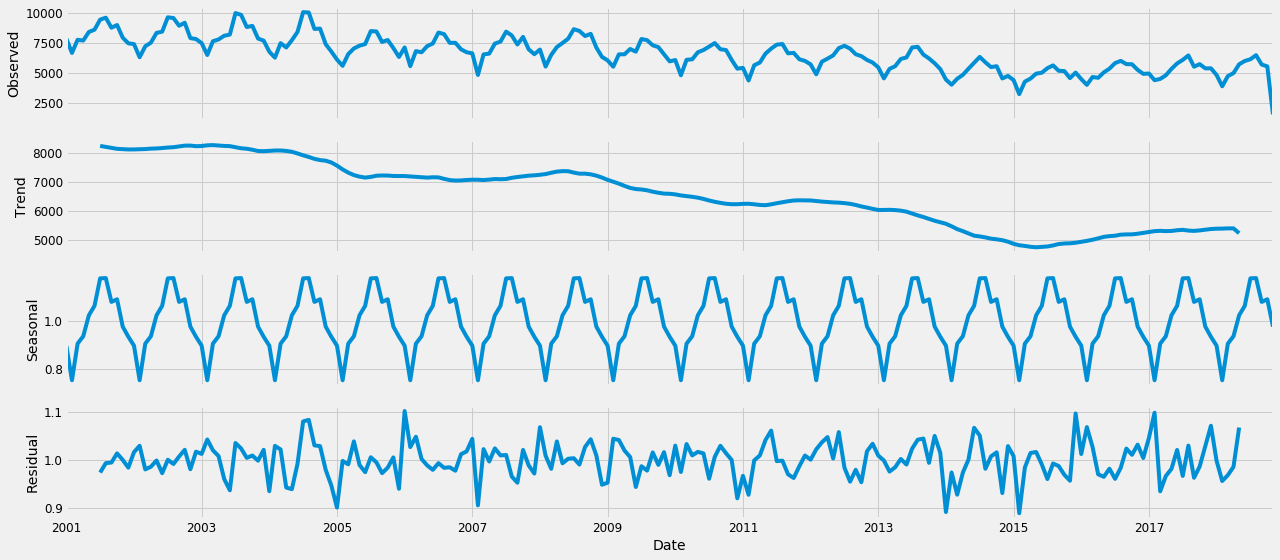

In [40]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(data, model='multiplicative')
fig = decomposition.plot()
plt.show()
fig.savefig('decomposition.png', dpi=fig.dpi)

In [16]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [20]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:4382.4250259565415
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3982.414131259732
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:3128.7939498959195
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2953.9579402876
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:3116.753529501545
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:3104.2595048753
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2968.654454182135
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2955.4693137572567
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:4210.880472997185
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3641.955953854525
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:3055.2370650829826
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2881.332470358733
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:3069.042961950497
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:3039.170735612095
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2911.3860567583997
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2882.6085662655814
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:3404.7086492229946
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:3124.587398050995
ARIMA(0

In [22]:
mod = sm.tsa.statespace.SARIMAX(data,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7009      0.087      8.044      0.000       0.530       0.872
ma.L1         -1.0000      0.047    -21.147      0.000      -1.093      -0.907
ma.S.L12      -0.7440      0.088     -8.413      0.000      -0.917      -0.571
sigma2       1.51e+05   3.13e-07   4.82e+11      0.000    1.51e+05    1.51e+05


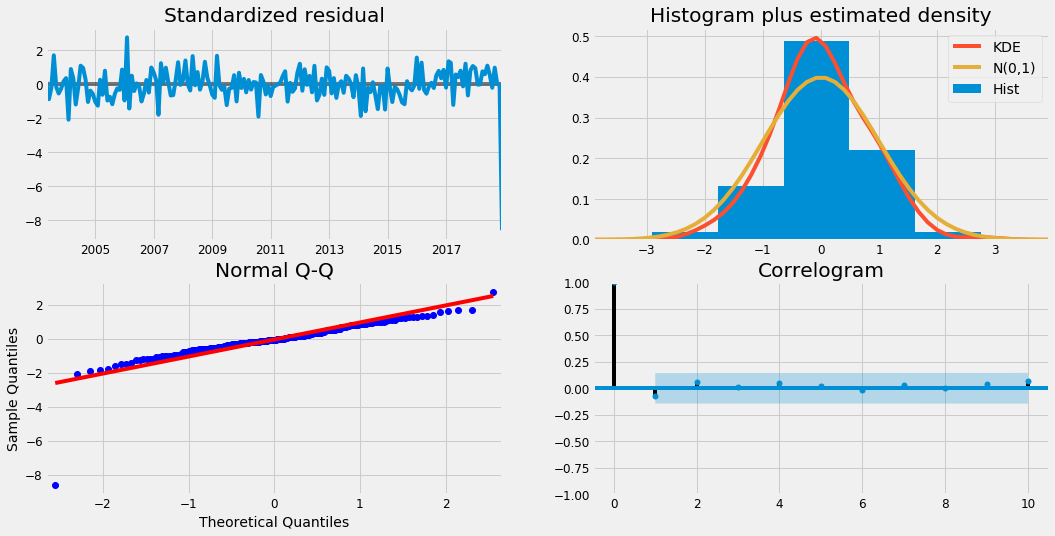

In [41]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()
fig.savefig('diagnostics.png', dpi=fig.dpi)

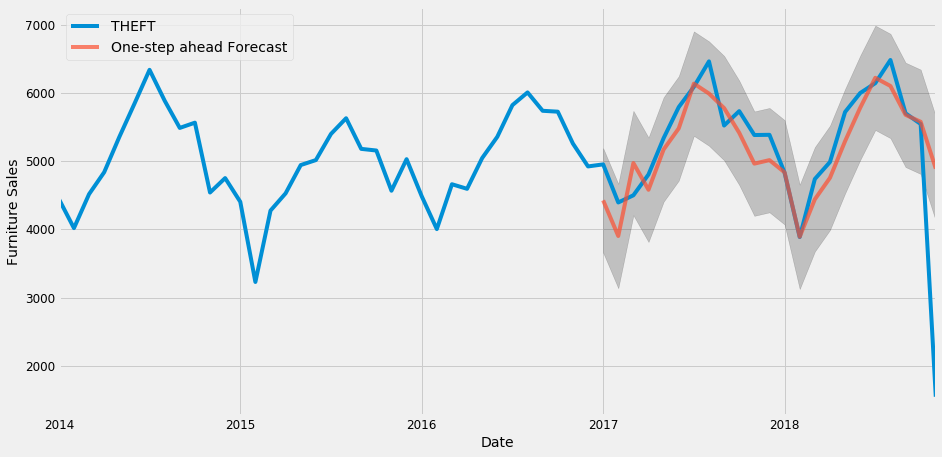

In [38]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-31'), dynamic=False)
pred_ci = pred.conf_int()

ax = data['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()

plt.show()

fig.savefig('predictive.png', dpi=fig.dpi)

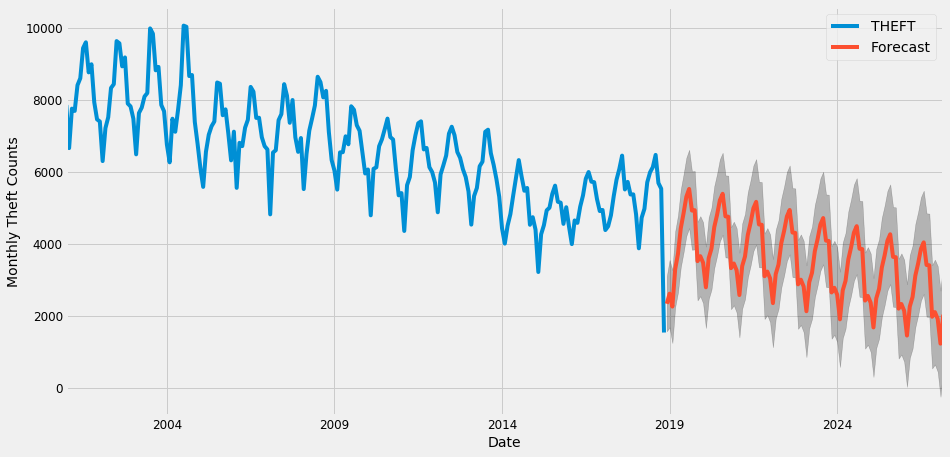

In [43]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = data.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Monthly Theft Counts')

plt.legend()
plt.show()
fig.savefig('forecast.png', dpi=fig.dpi)

In [31]:
results

In [10]:
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:2792.804802512551

from plotly.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data, model='multiplicative')
fig = result.plot()
plot_mpl(fig)

ModuleNotFoundError: No module named 'plotly'

In [ ]:
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
rcParams['figure.figsize'] = 18, 8

decomposition = seasonal_decompose(data, model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
from pyramid.arima import auto_arima

stepwise_model = auto_arima(data, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

print(stepwise_model.aic())

In [ ]:
train = by_month.loc[:'2017-12-01']
test = by_month.loc['2018-01-01':]


In [ ]:
stepwise_model.fit(train)

In [ ]:
future_forecast = stepwise_model.predict(n_periods=37)

In [ ]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=[‘Prediction’])

pd.concat([test,future_forecast],axis=1).iplot()
pd.concat([by_month,future_forecast],axis=1).iplot()